In [1]:
import numpy as np
import pandas as pd

import os
import glob

from subprocess import call

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# number of frames per video fixed upfront
nFrames_Video = 20

In [3]:
dfFiles = pd.read_csv("../data/04-chalearn/train/train_list.txt", sep=" ", header=None, names=["sFile", "sFileDepth", "nLabel"])

In [4]:
dfFiles.tail()

,sFile,sFileDepth,nLabel
35873,train/180/M_35874.avi,train/180/K_35874.avi,28
35874,train/180/M_35875.avi,train/180/K_35875.avi,33
35875,train/180/M_35876.avi,train/180/K_35876.avi,1
35876,train/180/M_35877.avi,train/180/K_35877.avi,14
35877,train/180/M_35878.avi,train/180/K_35878.avi,162


In [5]:
dfFiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35878 entries, 0 to 35877
Data columns (total 3 columns):
sFile         35878 non-null object
sFileDepth    35878 non-null object
nLabel        35878 non-null int64
dtypes: int64(1), object(2)
memory usage: 841.0+ KB


In [13]:
seLabels = dfFiles.groupby("nLabel").size().sort_values(ascending=False)

In [20]:
print("%d videos, with %d labels, occuring between %d-%d times" % (len(dfFiles), len(seLabels), min(seLabels), max(seLabels)))

35878 videos, with 249 labels, occuring between 64-851 times


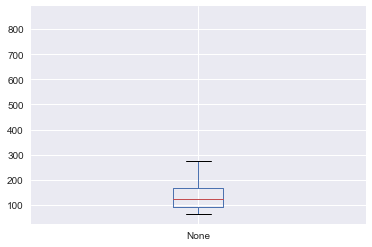

In [22]:
seLabels.plot.box()
#plt.plot(list(seLabels))

In [23]:
# split train vs test data
fTest = 0.2
dfFiles["sTrain_test"] = "train"

In [24]:
for g in dfFiles.groupby("nLabel"):
    pos = g[1].sample(frac = fTest).index
    dfFiles.loc[pos, "sTrain_test"] = "test"

In [25]:
dfFiles.groupby("sTrain_test").size()

sTrain_test
test      7173
train    28705
dtype: int64

In [26]:
dfFiles.head()

,sFile,sFileDepth,nLabel,sTrain_test
0,train/001/M_00001.avi,train/001/K_00001.avi,26,test
1,train/001/M_00002.avi,train/001/K_00002.avi,19,test
2,train/001/M_00003.avi,train/001/K_00003.avi,20,train
3,train/001/M_00004.avi,train/001/K_00004.avi,135,train
4,train/001/M_00005.avi,train/001/K_00005.avi,152,train
